In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("aluminum_5_50nm step1.25nm.csv")
data.head()

,Unnamed: 0,R_nm,wavelength_nm,abs
0,0,5.0,300.000000,0.025922
1,1,5.0,301.820536,0.025442
2,2,5.0,303.652120,0.024977
3,3,5.0,305.494819,0.024522
4,4,5.0,307.348700,0.024075


In [3]:
radius = np.arange(0.5, 5.1, 0.125)
N = radius.shape[0]
N

37

In [4]:
a = data["R_nm"]
a = a.values
a = a.reshape(N, 200, 1)
a

array([[[ 5.  ],
        [ 5.  ],
        [ 5.  ],
        ...,
        [ 5.  ],
        [ 5.  ],
        [ 5.  ]],

       [[ 6.25],
        [ 6.25],
        [ 6.25],
        ...,
        [ 6.25],
        [ 6.25],
        [ 6.25]],

       [[ 7.5 ],
        [ 7.5 ],
        [ 7.5 ],
        ...,
        [ 7.5 ],
        [ 7.5 ],
        [ 7.5 ]],

       ...,

       [[47.5 ],
        [47.5 ],
        [47.5 ],
        ...,
        [47.5 ],
        [47.5 ],
        [47.5 ]],

       [[48.75],
        [48.75],
        [48.75],
        ...,
        [48.75],
        [48.75],
        [48.75]],

       [[50.  ],
        [50.  ],
        [50.  ],
        ...,
        [50.  ],
        [50.  ],
        [50.  ]]])

In [5]:
result = ["wavelength_nm", "abs"]
b = data[result]
b = b.values
b = b.reshape(N, 200, 2)
b[1]

array([[3.00000000e+02, 2.59216383e-02],
       [3.01820536e+02, 2.54415458e-02],
       [3.03652120e+02, 2.49772809e-02],
       [3.05494819e+02, 2.45218014e-02],
       [3.07348700e+02, 2.40749448e-02],
       [3.09213831e+02, 2.36365129e-02],
       [3.11090281e+02, 2.32108555e-02],
       [3.12978118e+02, 2.28046014e-02],
       [3.14877411e+02, 2.24054373e-02],
       [3.16788230e+02, 2.20132501e-02],
       [3.18710644e+02, 2.16279132e-02],
       [3.20644725e+02, 2.12527391e-02],
       [3.22590543e+02, 2.08953500e-02],
       [3.24548169e+02, 2.05436971e-02],
       [3.26517674e+02, 2.01976935e-02],
       [3.28499131e+02, 1.98572798e-02],
       [3.30492613e+02, 1.95223719e-02],
       [3.32498192e+02, 1.92024519e-02],
       [3.34515942e+02, 1.88941545e-02],
       [3.36545936e+02, 1.85902951e-02],
       [3.38588250e+02, 1.82908498e-02],
       [3.40642957e+02, 1.79957452e-02],
       [3.42710133e+02, 1.77077187e-02],
       [3.44789853e+02, 1.74352349e-02],
       [3.468821

### Splitting data

In [6]:
from sklearn.model_selection import train_test_split
a_train, a_valid, b_train, b_valid = train_test_split(a, b, train_size=0.85, test_size=0.15, random_state = 22)

In [7]:
a_train.shape

(31, 200, 1)

In [8]:
a_train = a_train.reshape(31, 200*1)
b_train = b_train.reshape(31, 200*2)
a_valid = a_valid.reshape(6 , 200*1)
b_valid

array([[[3.00000000e+02, 1.03188370e+00],
        [3.01820536e+02, 1.04472135e+00],
        [3.03652120e+02, 1.05815110e+00],
        ...,
        [9.87972684e+02, 1.66989261e-01],
        [9.93968150e+02, 1.63953798e-01],
        [1.00000000e+03, 1.61042516e-01]],

       [[3.00000000e+02, 9.86674487e-01],
        [3.01820536e+02, 9.90092616e-01],
        [3.03652120e+02, 9.92686838e-01],
        ...,
        [9.87972684e+02, 2.08278700e-01],
        [9.93968150e+02, 2.03309882e-01],
        [1.00000000e+03, 1.98330496e-01]],

       [[3.00000000e+02, 9.86034858e-01],
        [3.01820536e+02, 9.90700324e-01],
        [3.03652120e+02, 9.96301199e-01],
        ...,
        [9.87972684e+02, 1.82818734e-01],
        [9.93968150e+02, 1.78829293e-01],
        [1.00000000e+03, 1.74954191e-01]],

       [[3.00000000e+02, 1.21234111e+00],
        [3.01820536e+02, 1.20122113e+00],
        [3.03652120e+02, 1.18969722e+00],
        ...,
        [9.87972684e+02, 2.03703220e-01],
        [9.9396815

In [9]:
a_valid

array([[45.  , 45.  , 45.  , ..., 45.  , 45.  , 45.  ],
       [48.75, 48.75, 48.75, ..., 48.75, 48.75, 48.75],
       [47.5 , 47.5 , 47.5 , ..., 47.5 , 47.5 , 47.5 ],
       [31.25, 31.25, 31.25, ..., 31.25, 31.25, 31.25],
       [38.75, 38.75, 38.75, ..., 38.75, 38.75, 38.75],
       [ 6.25,  6.25,  6.25, ...,  6.25,  6.25,  6.25]])

### 1.Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(a_train, b_train)

LinearRegression()

In [11]:
linear_preds = linear.predict(a_valid)
linear_preds = linear_preds.reshape(6, 200, 2)
linear_preds.shape

(6, 200, 2)

In [12]:
b_valid[ :, :, 1]

array([[1.0318837 , 1.04472135, 1.0581511 , ..., 0.16698926, 0.1639538 ,
        0.16104252],
       [0.98667449, 0.99009262, 0.99268684, ..., 0.2082787 , 0.20330988,
        0.1983305 ],
       [0.98603486, 0.99070032, 0.9963012 , ..., 0.18281873, 0.17882929,
        0.17495419],
       [1.21234111, 1.20122113, 1.18969722, ..., 0.20370322, 0.20844981,
        0.21336711],
       [1.26665779, 1.25568613, 1.24366909, ..., 0.16542841, 0.16471587,
        0.16388738],
       [0.02592164, 0.02544155, 0.02497728, ..., 0.0019119 , 0.00184625,
        0.00178264]])

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
print("MSR LinearRegression: %f" %mean_squared_error(b_valid[ :, :, 1], linear_preds[ :, :, 1]))
print("R2 LinearRegressor: %f %%" %(100*r2_score(b_valid[ :, :, 1], linear_preds[ :, :, 1])))

MSR LinearRegression: 0.006613
R2 LinearRegressor: 93.642302 %


R2 LinearRegressor: 99.244242 %


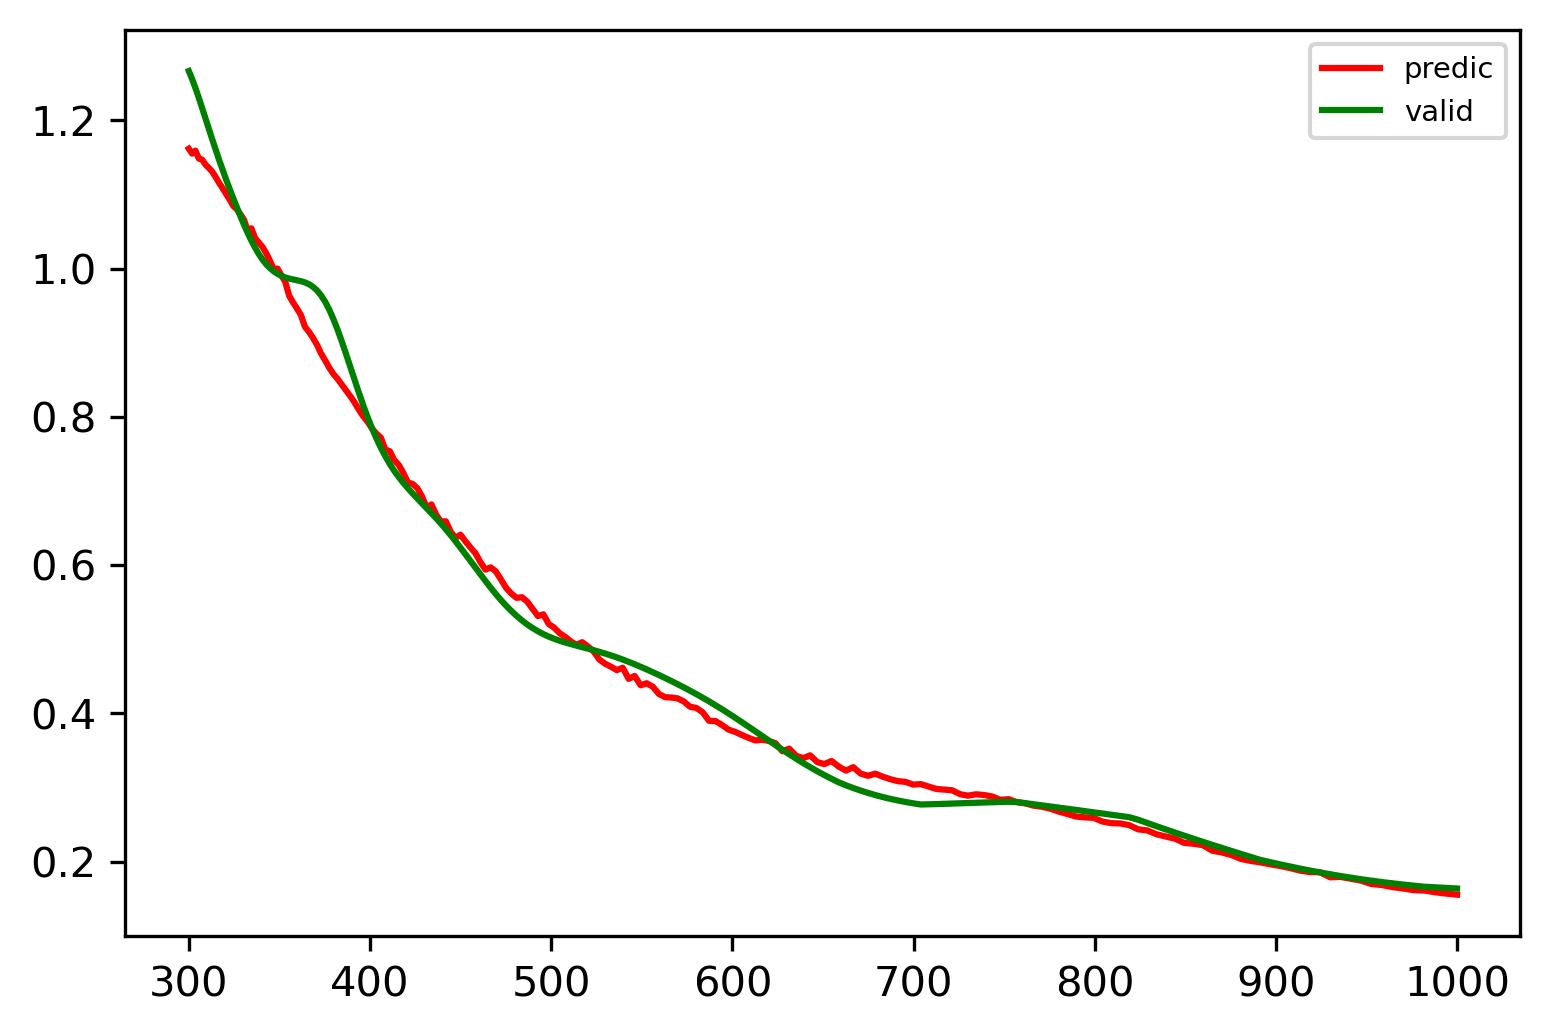

In [42]:
import matplotlib.pyplot as plt
plt.figure(dpi = 300)
n = 4

plt.plot(linear_preds[n, :, 0], linear_preds[n, :, 1], "r", label="predic")
plt.plot(b_valid[n, :, 0], b_valid[n, :, 1], "g", label="valid")
print("R2 LinearRegressor: %f %%" %(100*r2_score(b_valid[ n, :, 1], linear_preds[ n, :, 1])))

plt.legend(fontsize=7)
plt.show()

### 2.Decision Tree

In [19]:
from sklearn.tree import DecisionTreeRegressor
decision_model = DecisionTreeRegressor()
decision_model.fit(a_train, b_train)

DecisionTreeRegressor()

In [20]:
decision_preds = decision_model.predict(a_valid)
decision_preds = decision_preds.reshape(6, 200, 2)
decision_preds

array([[[3.00000000e+02, 1.18589132e+00],
        [3.01820536e+02, 1.19792490e+00],
        [3.03652120e+02, 1.20719351e+00],
        ...,
        [9.87972684e+02, 1.55875017e-01],
        [9.93968150e+02, 1.54270966e-01],
        [1.00000000e+03, 1.52876294e-01]],

       [[3.00000000e+02, 9.34254357e-01],
        [3.01820536e+02, 9.40083301e-01],
        [3.03652120e+02, 9.46225046e-01],
        ...,
        [9.87972684e+02, 2.25874315e-01],
        [9.93968150e+02, 2.20910227e-01],
        [1.00000000e+03, 2.15774421e-01]],

       [[3.00000000e+02, 9.85681773e-01],
        [3.01820536e+02, 9.97615795e-01],
        [3.03652120e+02, 1.01061579e+00],
        ...,
        [9.87972684e+02, 1.76620729e-01],
        [9.93968150e+02, 1.72986872e-01],
        [1.00000000e+03, 1.69471572e-01]],

       [[3.00000000e+02, 1.12437403e+00],
        [3.01820536e+02, 1.10470845e+00],
        [3.03652120e+02, 1.08664252e+00],
        ...,
        [9.87972684e+02, 1.99014915e-01],
        [9.9396815

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
print("MSR DecisionRegressor: %f" %mean_squared_error(b_valid[ :, :, 1], decision_preds[ :, :, 1]))
print("R2 DecisionRegressor: %f %%" %(100*r2_score(b_valid[ :, :, 1], decision_preds[ :, :, 1])))

MSR DecisionRegressor: 0.000985
R2 DecisionRegressor: 98.199853 %


R2 DecisionRegressor: 99.608877 %


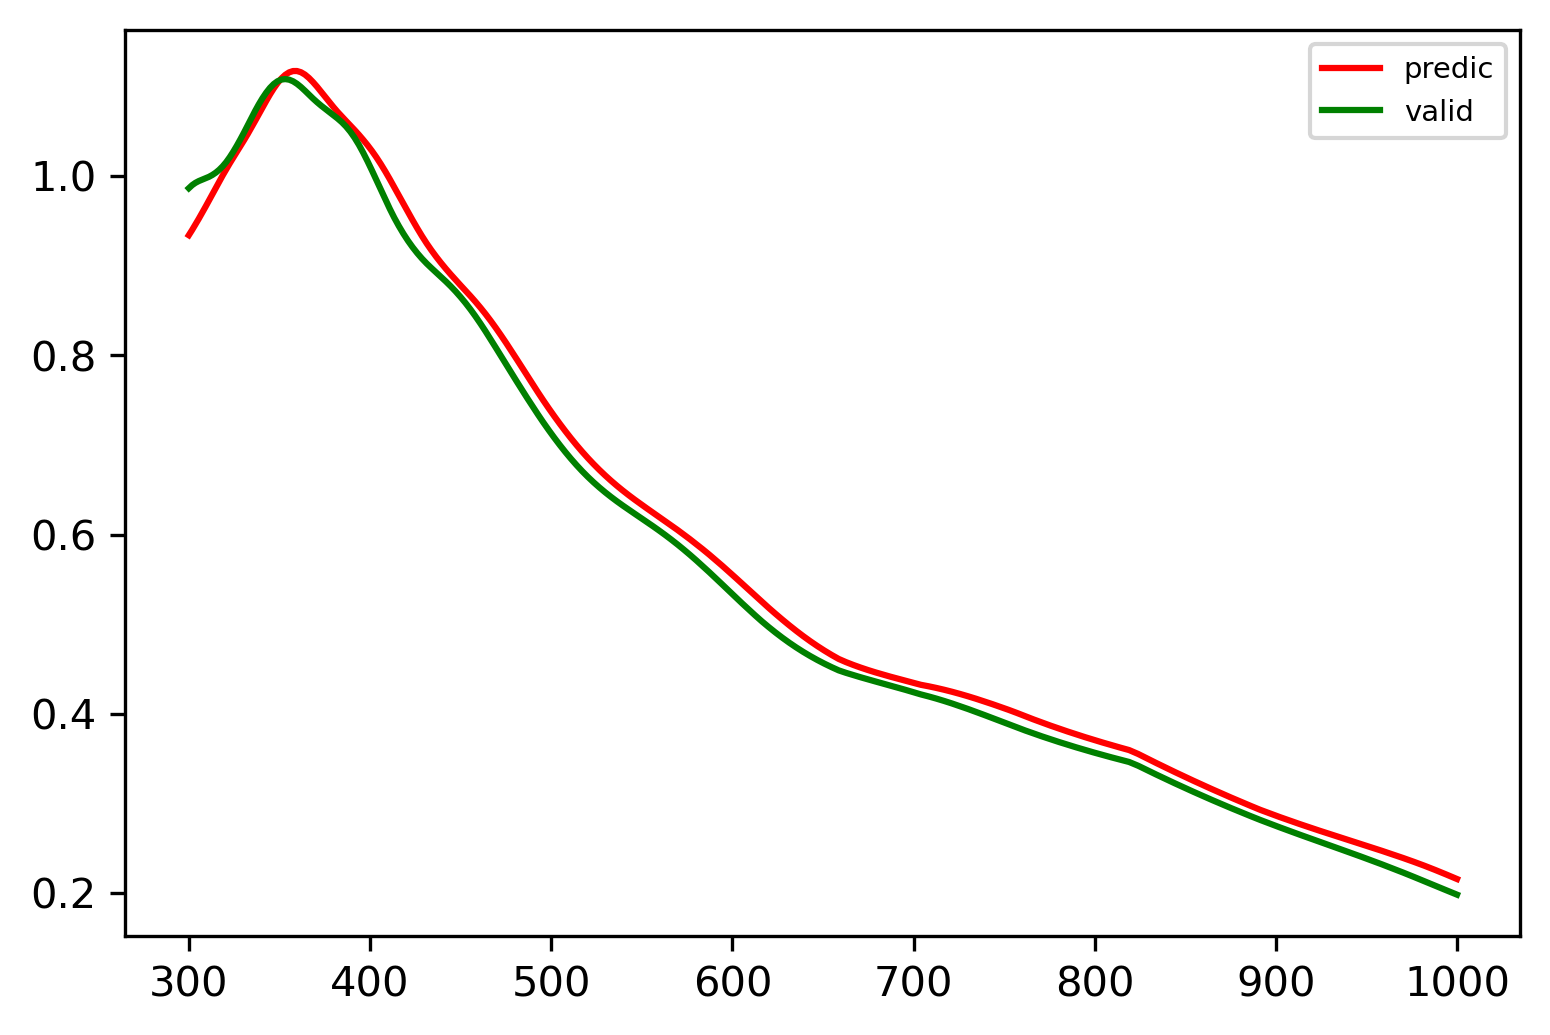

In [41]:
import matplotlib.pyplot as plt
plt.figure(dpi = 300)
n = 1

plt.plot(decision_preds[n, :, 0], decision_preds[n, :, 1], "r", label="predic")
plt.plot(b_valid[n, :, 0], b_valid[n, :, 1], "g", label="valid")
print("R2 DecisionRegressor: %f %%" %(100*r2_score(b_valid[ n, :, 1], decision_preds[ n, :, 1])))

plt.legend(fontsize=7)
plt.show()

### 3.Random Forest Regression

In [24]:
from sklearn.ensemble import RandomForestRegressor
random_model = RandomForestRegressor(random_state =1)
random_model.fit(a_train, b_train)

random_preds = random_model.predict(a_valid)
random_preds = random_preds.reshape(6, 200, 2)
random_preds

array([[[3.00000000e+02, 1.14561318e+00],
        [3.01820536e+02, 1.15683694e+00],
        [3.03652120e+02, 1.16617884e+00],
        ...,
        [9.87972684e+02, 1.61205081e-01],
        [9.93968150e+02, 1.59232543e-01],
        [1.00000000e+03, 1.57446370e-01]],

       [[3.00000000e+02, 9.73503979e-01],
        [3.01820536e+02, 9.81457596e-01],
        [3.03652120e+02, 9.89693693e-01],
        ...,
        [9.87972684e+02, 2.05075388e-01],
        [9.93968150e+02, 2.00843061e-01],
        [1.00000000e+03, 1.96560964e-01]],

       [[3.00000000e+02, 9.95103494e-01],
        [3.01820536e+02, 1.00562124e+00],
        [3.03652120e+02, 1.01673781e+00],
        ...,
        [9.87972684e+02, 1.84388882e-01],
        [9.93968150e+02, 1.80715252e-01],
        [1.00000000e+03, 1.77113767e-01]],

       [[3.00000000e+02, 1.13456582e+00],
        [3.01820536e+02, 1.11952462e+00],
        [3.03652120e+02, 1.10551411e+00],
        ...,
        [9.87972684e+02, 1.88721544e-01],
        [9.9396815

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
print("MSR RandomRegression: %f" %mean_squared_error(b_valid[ :, :, 1], random_preds[ :, :, 1]))
print("R2 RandomRegressor: %f %%" %(100*r2_score(b_valid[ :, :, 1], random_preds[ :, :, 1])))

MSR RandomRegression: 0.000622
R2 RandomRegressor: 99.013552 %


R2 RandomRegressor: 98.613476 %


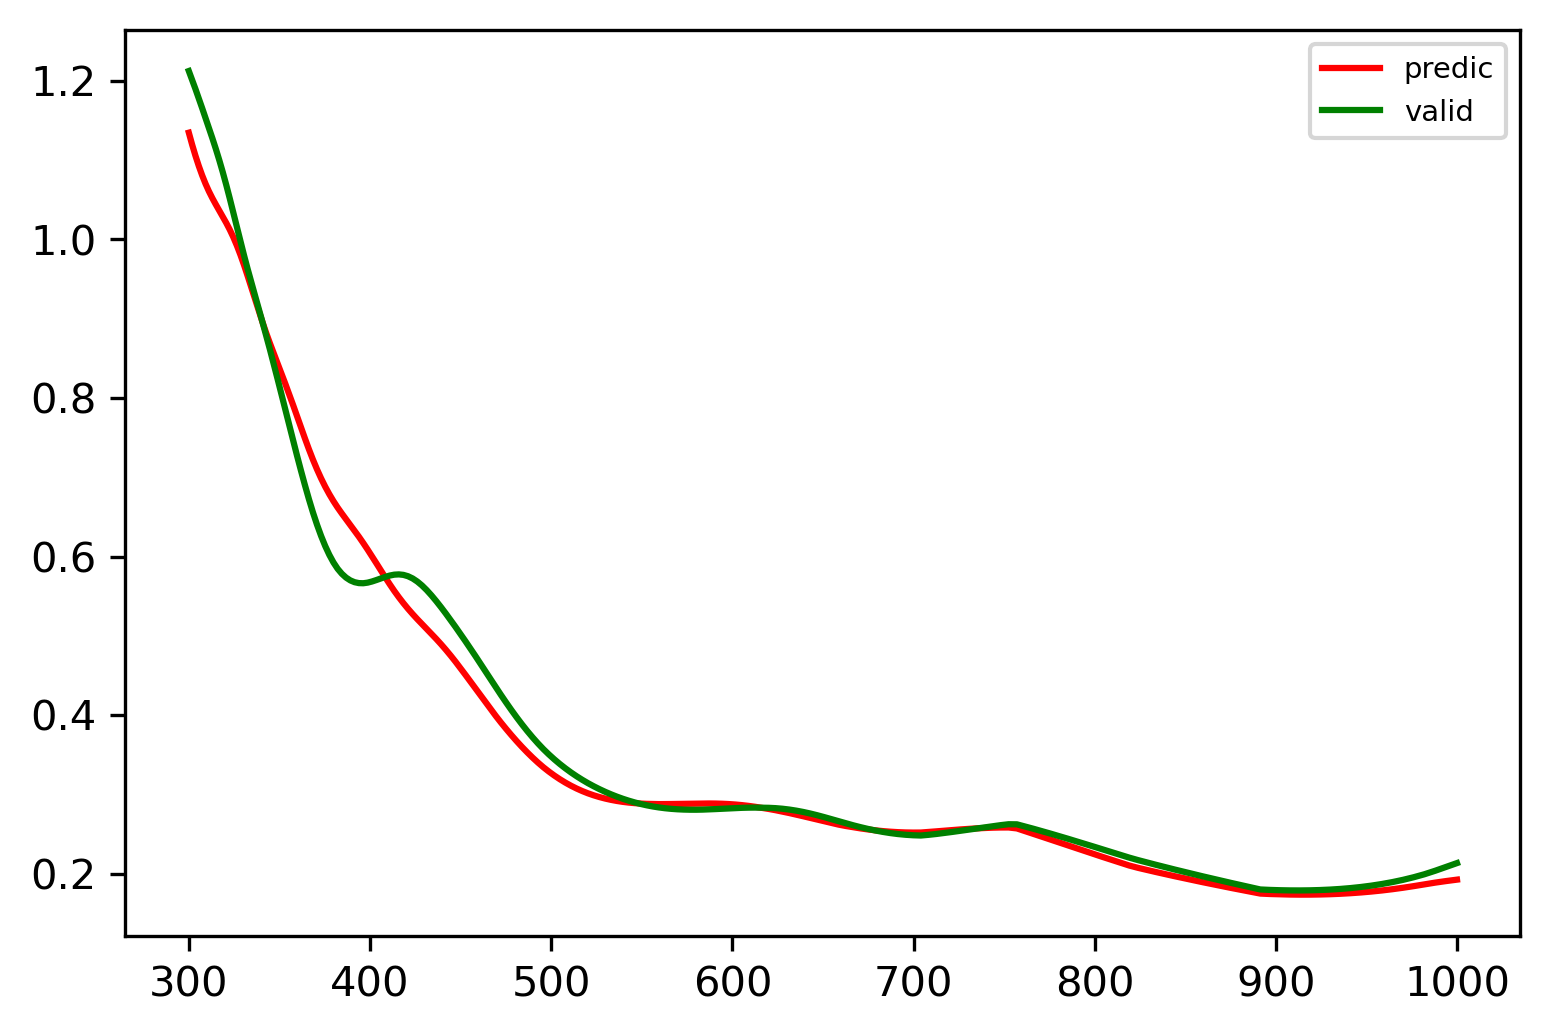

In [38]:
import matplotlib.pyplot as plt
plt.figure(dpi = 300)
n = 3

plt.plot(random_preds[n, :, 0], random_preds[n, :, 1], "r", label="predic")
plt.plot(b_valid[n, :, 0], b_valid[n, :, 1], "g", label="valid")
print("R2 RandomRegressor: %f %%" %(100*r2_score(b_valid[ n, :, 1], random_preds[ n, :, 1])))

plt.legend(fontsize=7)
plt.show()

### 4.Kneighbors Regression

In [27]:
from sklearn.neighbors import KNeighborsRegressor
n_neighbors = 4
for i in enumerate(["uniform"]):
    kn_model = KNeighborsRegressor(n_neighbors)
    kn_model.fit(a_train, b_train)

In [28]:
kn_preds = kn_model.predict(a_valid)
kn_preds = kn_preds.reshape(6, 200, 2)
kn_preds

array([[[3.00000000e+02, 1.16234665e+00],
        [3.01820536e+02, 1.16889463e+00],
        [3.03652120e+02, 1.17388490e+00],
        ...,
        [9.87972684e+02, 1.66290316e-01],
        [9.93968150e+02, 1.64703198e-01],
        [1.00000000e+03, 1.63275113e-01]],

       [[3.00000000e+02, 1.08026763e+00],
        [3.01820536e+02, 1.08906724e+00],
        [3.03652120e+02, 1.09695859e+00],
        ...,
        [9.87972684e+02, 1.80293057e-01],
        [9.93968150e+02, 1.77530847e-01],
        [1.00000000e+03, 1.74863576e-01]],

       [[3.00000000e+02, 1.08026763e+00],
        [3.01820536e+02, 1.08906724e+00],
        [3.03652120e+02, 1.09695859e+00],
        ...,
        [9.87972684e+02, 1.80293057e-01],
        [9.93968150e+02, 1.77530847e-01],
        [1.00000000e+03, 1.74863576e-01]],

       [[3.00000000e+02, 1.14437639e+00],
        [3.01820536e+02, 1.13421259e+00],
        [3.03652120e+02, 1.12485181e+00],
        ...,
        [9.87972684e+02, 1.76028828e-01],
        [9.9396815

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
print("MSR KNeiborsRegression: %f" %mean_squared_error(b_valid[ :, :, 1], kn_preds[ :, :, 1]))
print("R2 KNeiborsRegressor: %f %%" %(100*r2_score(b_valid[ :, :, 1], kn_preds[ :, :, 1])))

MSR KNeiborsRegression: 0.001291
R2 KNeiborsRegressor: 97.415375 %


R2 KNeiborsRegressor: 99.317850 %


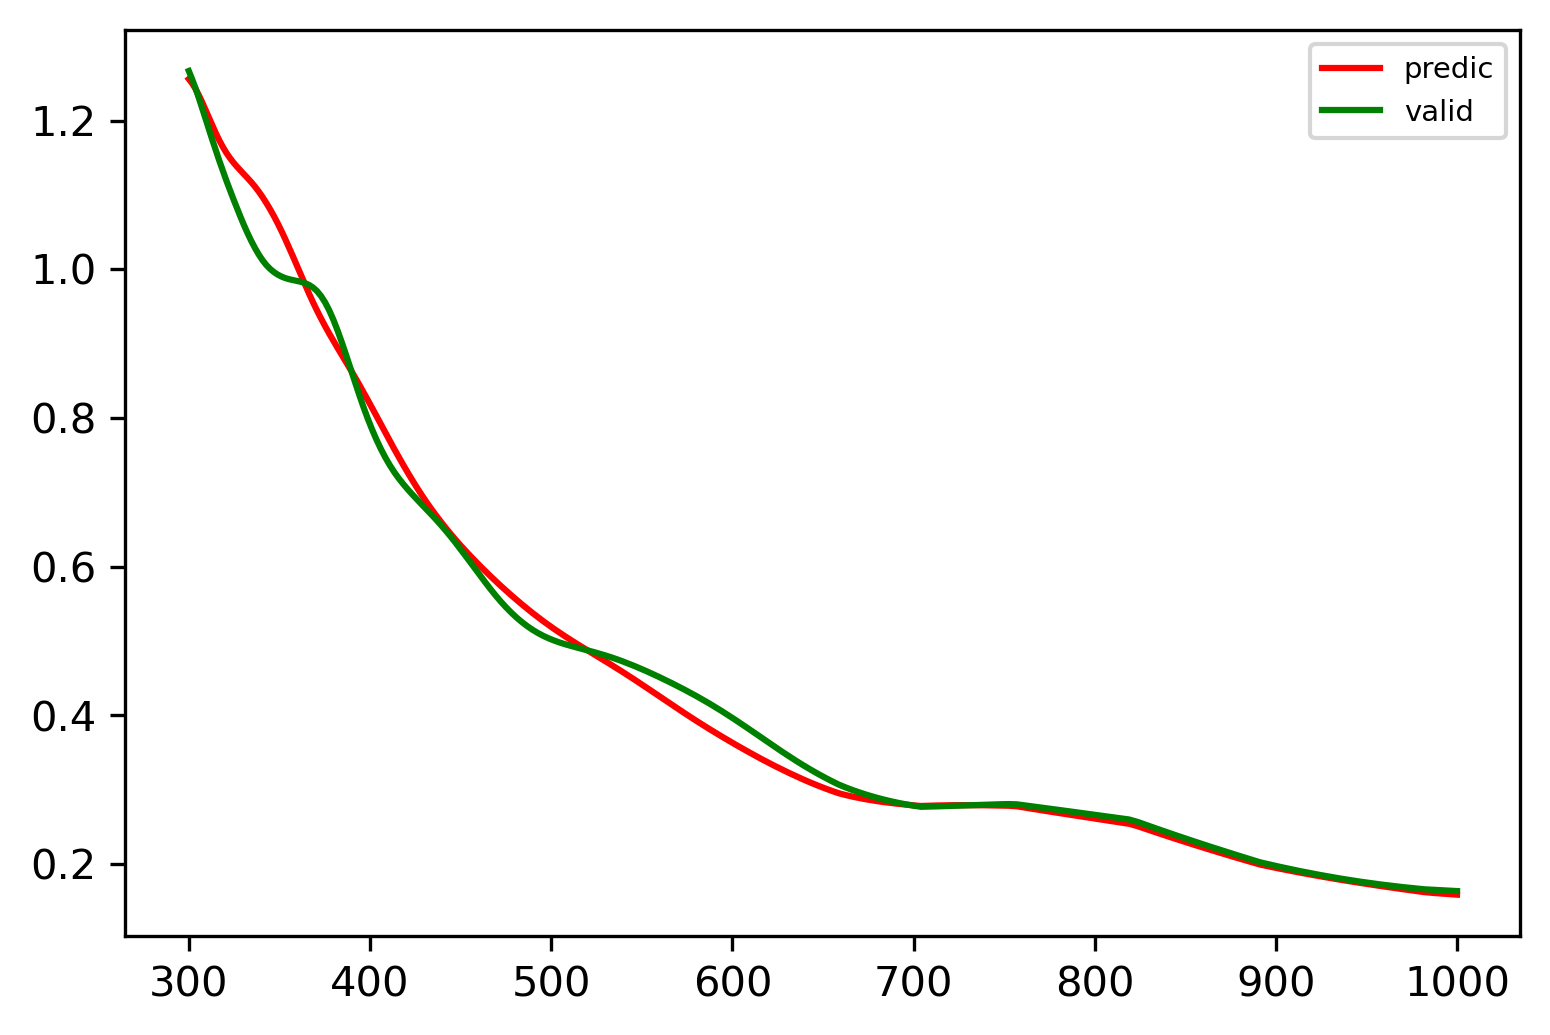

In [37]:
import matplotlib.pyplot as plt
plt.figure(dpi = 300)
n = 4

plt.plot(kn_preds[n, :, 0], kn_preds[n, :, 1], "r", label="predic")
plt.plot(b_valid[n, :, 0], b_valid[n, :, 1], "g", label="valid")
print("R2 KNeiborsRegressor: %f %%" %(100*r2_score(b_valid[ n, :, 1], kn_preds[ n, :, 1])))

plt.legend(fontsize=7)
plt.show()

### 5.ExtraTressRegression

In [31]:
from sklearn.ensemble import ExtraTreesRegressor
extra_model = ExtraTreesRegressor(random_state =1)
extra_model.fit(a_train, b_train)

ExtraTreesRegressor(random_state=1)

In [32]:
extra_preds = extra_model.predict(a_valid)
extra_preds = extra_preds.reshape(6, 200, 2)
extra_preds

array([[[3.00000000e+02, 1.09579702e+00],
        [3.01820536e+02, 1.10778580e+00],
        [3.03652120e+02, 1.11873354e+00],
        ...,
        [9.87972684e+02, 1.65210587e-01],
        [9.93968150e+02, 1.62693124e-01],
        [1.00000000e+03, 1.60344169e-01]],

       [[3.00000000e+02, 9.50196856e-01],
        [3.01820536e+02, 9.57918374e-01],
        [3.03652120e+02, 9.66186178e-01],
        ...,
        [9.87972684e+02, 2.10605703e-01],
        [9.93968150e+02, 2.06053987e-01],
        [1.00000000e+03, 2.01420538e-01]],

       [[3.00000000e+02, 9.68196452e-01],
        [3.01820536e+02, 9.78054747e-01],
        [3.03652120e+02, 9.88722939e-01],
        ...,
        [9.87972684e+02, 1.93366948e-01],
        [9.93968150e+02, 1.89280813e-01],
        [1.00000000e+03, 1.85214541e-01]],

       [[3.00000000e+02, 1.14887097e+00],
        [3.01820536e+02, 1.13670993e+00],
        [3.03652120e+02, 1.12522544e+00],
        ...,
        [9.87972684e+02, 1.87624028e-01],
        [9.9396815

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
print("MSR ExtraTreesRegressor: %f" %mean_squared_error(b_valid[ :, :, 1], extra_preds[ :, :, 1]))
print("R2 ExtraTreesRegressor: %f %%" %(100*r2_score(b_valid[ :, :, 1], extra_preds[ :, :, 1])))

MSR ExtraTreesRegressor: 0.000420
R2 ExtraTreesRegressor: 99.437594 %


R2 ExtraTreedRegressor: 98.618680 %


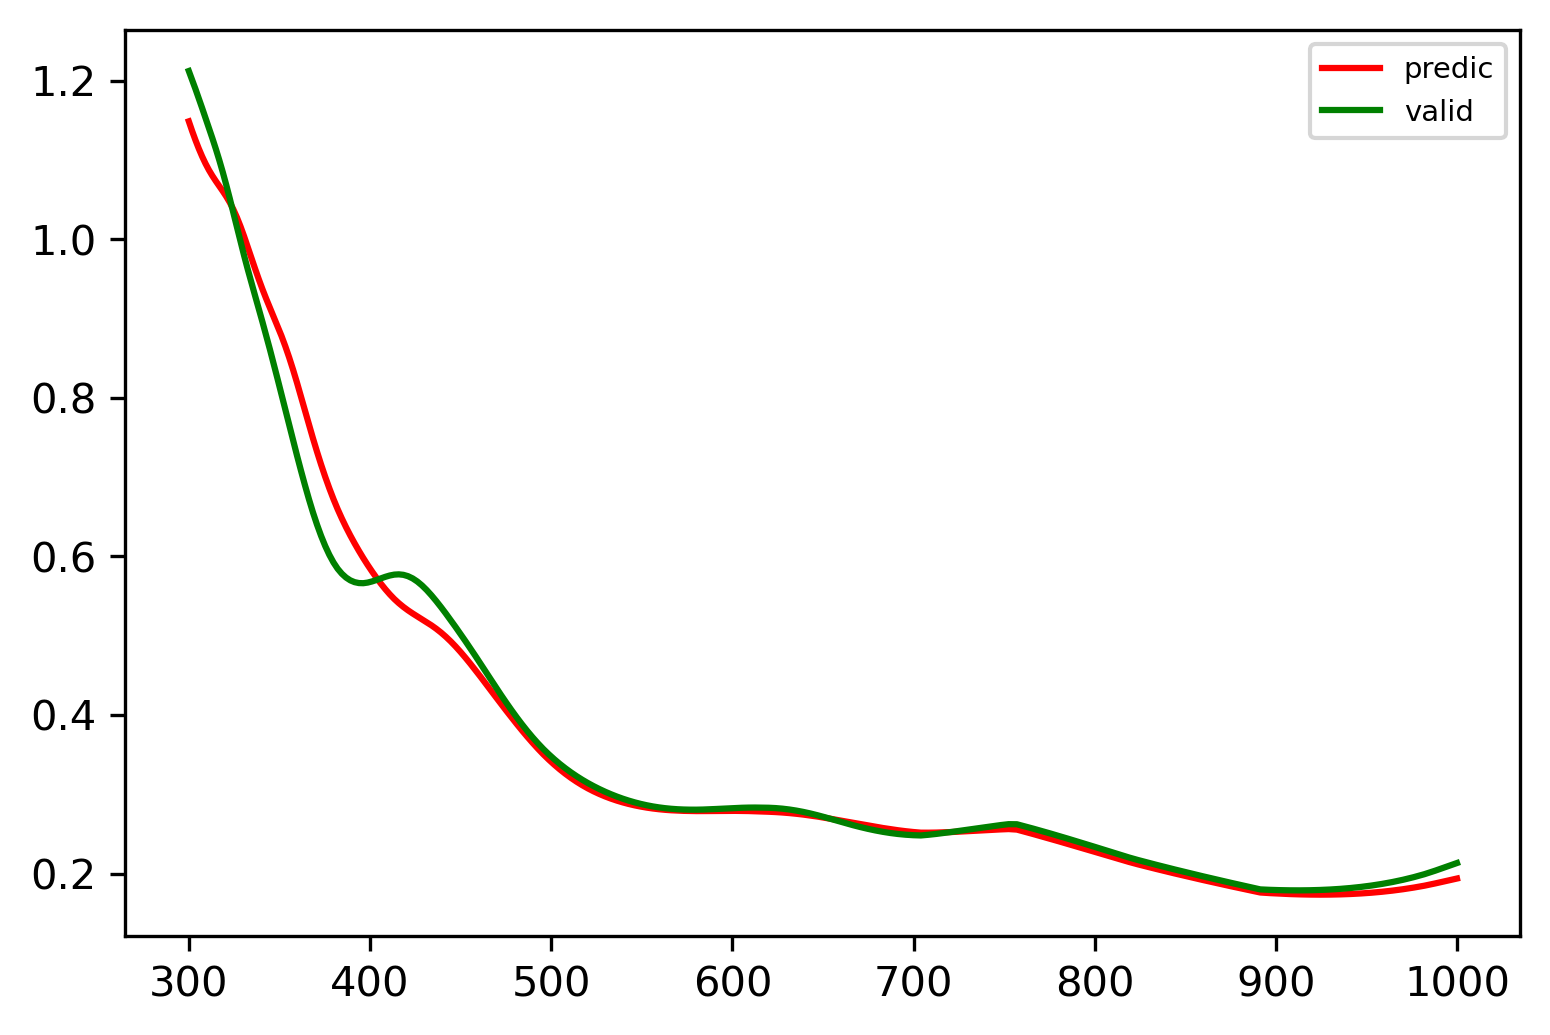

In [35]:
import matplotlib.pyplot as plt
plt.figure(dpi = 300)
n = 3

plt.plot(extra_preds[n, :, 0], extra_preds[n, :, 1], "r", label="predic")
plt.plot(b_valid[n, :, 0], b_valid[n, :, 1], "g", label="valid")
print("R2 ExtraTreedRegressor: %f %%" %(100*r2_score(b_valid[ n, :, 1], extra_preds[ n, :, 1])))

plt.legend(fontsize=7)
plt.show()

### Save model DecisionRegression

In [43]:
import joblib

In [44]:
joblib.dump(decision_model, 'DecisionRegression preds wl, Q_abs.joblib')

['DecisionRegression preds wl, Q_abs.joblib']